Columns in the fetched data: Index(['user_id', 'application', 'session_duration', 'download_data',
       'upload_data'],
      dtype='object')
        user_id application  session_duration  download_data  upload_data
0  3.366496e+10     Samsung         1823652.0    308879636.0   36749741.0
1  3.368185e+10     Samsung         1365104.0    653384965.0   53800391.0
2  3.376063e+10     Samsung         1361762.0    279807335.0   27883638.0
3  3.375034e+10   undefined         1321509.0    846028530.0   43324218.0
4  3.369980e+10     Samsung         1089009.0    569138589.0   38542814.0
Cleaned Data:
         user_id application  session_duration  download_data  upload_data  \
92  3.368542e+10     Samsung          243504.0    556406594.0   43336429.0   
93  3.366132e+10       Apple          236570.0    757526492.0   40719212.0   
95  3.361513e+10     Samsung          231780.0    139043208.0   53052136.0   
96  3.366495e+10      Huawei          230839.0    329159454.0   30713366.0   
97  3.36

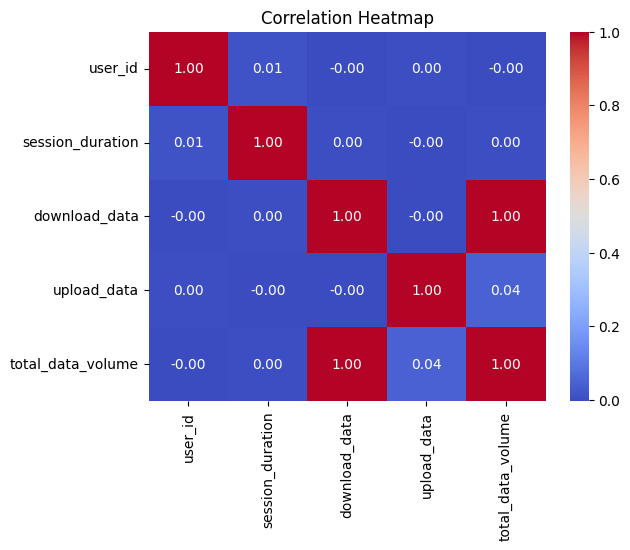

Performing PCA Analysis...


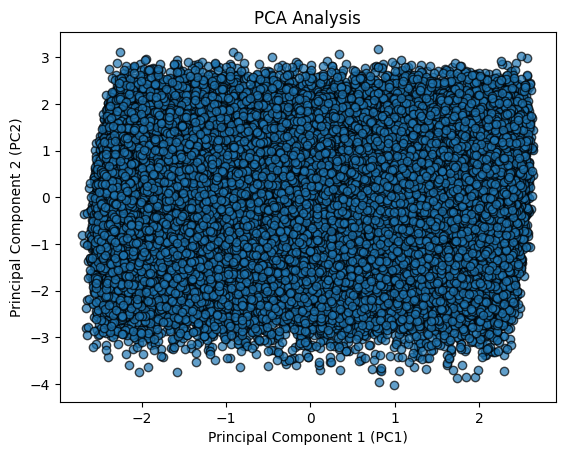

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys
import os

# Add the src directory to the system path for importing modules
sys.path.append(os.path.abspath('C:/Users/Hp/User_Overview_Analysis/scripts'))
from extract_data import connect_to_db  # Import the function from extract_data.py
from clean_data import clean_data  # Import the clean_data function

# Fetch data from PostgreSQL using the function from extract_data.py
df = connect_to_db()

# Clean the data using the function from clean_data.py
df = clean_data(df)

# Verify the cleaned data
print("Cleaned Data:")
print(df.info())
print(df.head())

# Drop non-numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])
print(f"Numeric Columns for Correlation Analysis: {numeric_columns.columns}")

# Correlation Analysis
print("Performing Correlation Analysis...")
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# PCA Analysis
print("Performing PCA Analysis...")
# Ensure 'total_data' column exists for PCA
if 'total_data' not in df.columns:
    df['total_data'] = df['download_data'] + df['upload_data']

# Features for PCA
features = ['session_duration', 'download_data', 'upload_data', 'total_data']

# Standardize the data
scaled_data = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot PCA components
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.7, edgecolors='k')
plt.title('PCA Analysis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()
